In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
url = "https://www.nfl.com/players/tom-brady/stats/"

In [3]:
html = requests.get(url)

In [4]:
bsobj = BeautifulSoup(html.content, "html.parser")

In [5]:
t = bsobj.find("div", {"class":"nfl-t-stats--table"})

In [6]:
for i in t.find_all("tr"):
    print(i.get_text())

WKOPPRESULTCOMPATTYDSAVGTDINTSCKSCKYRATEATTYDSAVGTDFUMLOST
1@CowboysW 19 - 318272127.81121787.32-1-0.50
2@SaintsW 20 - 1018341905.6101279.33-2-0.7011
3PackersL 12 - 1431422716.41032098.41-1-10
4ChiefsL 31 - 4139523857.430112114.711
5FalconsW 21 - 1535523516.8100092.73-3-10


In [7]:
ts = bsobj.find_all("table")

In [8]:
tds = []

for i in ts[1].find_all("tr"):
    tds.append(i)

In [9]:
years = {}

len(tds[1:])

many_lists = []
for i in tds[1:]:
    alist = list(i)
    many_lists.append(alist)

In [10]:
for i in many_lists:
    
    years[i[0].get_text()] = [t.get_text() for t in i]
    

In [11]:
years

{'2000': ['2000',
  'New England Patriots',
  '1',
  '0',
  '1',
  '3',
  '6',
  '2',
  '0',
  '0',
  '0',
  '0',
  '42.4',
  '',
  '',
  '',
  '',
  '',
  ''],
 '2001': ['2001',
  'New England Patriots',
  '15',
  '14',
  '264',
  '413',
  '2843',
  '6.9',
  '18',
  '12',
  '41',
  '216',
  '86.5',
  '36',
  '43',
  '1.2',
  '0',
  '',
  ''],
 '2002': ['2002',
  'New England Patriots',
  '16',
  '16',
  '373',
  '601',
  '3764',
  '6.3',
  '28',
  '14',
  '31',
  '190',
  '85.7',
  '42',
  '110',
  '2.6',
  '1',
  '',
  ''],
 '2003': ['2003',
  'New England Patriots',
  '16',
  '16',
  '317',
  '527',
  '3620',
  '6.9',
  '23',
  '12',
  '32',
  '219',
  '85.9',
  '42',
  '63',
  '1.5',
  '1',
  '',
  ''],
 '2004': ['2004',
  'New England Patriots',
  '16',
  '16',
  '288',
  '474',
  '3692',
  '7.8',
  '28',
  '14',
  '26',
  '162',
  '92.6',
  '43',
  '28',
  '0.6',
  '0',
  '',
  ''],
 '2005': ['2005',
  'New England Patriots',
  '16',
  '16',
  '334',
  '530',
  '4110',
  '7.8',
 

In [12]:
stats = ["Year", "Team", "Games Played", "Games Started", "Completions", "Passing Attempts", "Passing Yards", "Avg Passing Yards", "Touchdown Passes", "Interceptions", "Sacks", "Sack Yards Lost", "Rate (Passer QB Rating)", "Rushing Attempts", "Rushing Yards Gained", "Avg Yards/Carry", "Rushing Touchdowns", "Fumbles", "Lost Fumbles"]
brady = pd.DataFrame(years.values(), columns=stats)
brady

,Year,Team,Games Played,Games Started,Completions,Passing Attempts,Passing Yards,Avg Passing Yards,Touchdown Passes,Interceptions,Sacks,Sack Yards Lost,Rate (Passer QB Rating),Rushing Attempts,Rushing Yards Gained,Avg Yards/Carry,Rushing Touchdowns,Fumbles,Lost Fumbles
0,2000,New England Patriots,1,0,1,3,6,2,0,0,0,0,42.4,,,,,,
1,2001,New England Patriots,15,14,264,413,2843,6.9,18,12,41,216,86.5,36,43,1.2,0,,
2,2002,New England Patriots,16,16,373,601,3764,6.3,28,14,31,190,85.7,42,110,2.6,1,,
3,2003,New England Patriots,16,16,317,527,3620,6.9,23,12,32,219,85.9,42,63,1.5,1,,
4,2004,New England Patriots,16,16,288,474,3692,7.8,28,14,26,162,92.6,43,28,0.6,0,,
5,2005,New England Patriots,16,16,334,530,4110,7.8,26,14,26,188,92.3,27,89,3.3,1,,
6,2006,New England Patriots,16,16,319,516,3529,6.8,24,12,26,175,87.9,49,102,2.1,0,,
7,2007,New England Patriots,16,16,398,578,4806,8.3,50,8,21,128,117.2,37,98,2.6,2,,
8,2008,New England Patriots,1,1,7,11,76,6.9,0,0,0,0,83.9,,,,,,
9,2009,New England Patriots,16,16,371,565,4398,7.8,28,13,16,86,96.2,29,44,1.5,1,,


In [13]:
brady["Age"] = 22
counter = 22
new_age = []
for n in range(len(brady["Age"])):
    counter += 1
    new_age.append(counter)
brady["Age"] = new_age

In [14]:
brady = brady.drop([brady.index[0],brady.index[8],brady.index[22]])
brady = brady.reset_index(drop=True)
brady

,Year,Team,Games Played,Games Started,Completions,Passing Attempts,Passing Yards,Avg Passing Yards,Touchdown Passes,Interceptions,Sacks,Sack Yards Lost,Rate (Passer QB Rating),Rushing Attempts,Rushing Yards Gained,Avg Yards/Carry,Rushing Touchdowns,Fumbles,Lost Fumbles,Age
0,2001,New England Patriots,15,14,264,413,2843,6.9,18,12,41,216,86.5,36,43,1.2,0,,,24
1,2002,New England Patriots,16,16,373,601,3764,6.3,28,14,31,190,85.7,42,110,2.6,1,,,25
2,2003,New England Patriots,16,16,317,527,3620,6.9,23,12,32,219,85.9,42,63,1.5,1,,,26
3,2004,New England Patriots,16,16,288,474,3692,7.8,28,14,26,162,92.6,43,28,0.6,0,,,27
4,2005,New England Patriots,16,16,334,530,4110,7.8,26,14,26,188,92.3,27,89,3.3,1,,,28
5,2006,New England Patriots,16,16,319,516,3529,6.8,24,12,26,175,87.9,49,102,2.1,0,,,29
6,2007,New England Patriots,16,16,398,578,4806,8.3,50,8,21,128,117.2,37,98,2.6,2,,,30
7,2009,New England Patriots,16,16,371,565,4398,7.8,28,13,16,86,96.2,29,44,1.5,1,,,32
8,2010,New England Patriots,16,16,324,492,3900,7.9,36,4,25,175,111,31,30,1,1,,,33
9,2011,New England Patriots,16,16,401,611,5235,8.6,39,12,32,173,105.6,43,109,2.5,3,,,34


In [15]:
brady

,Year,Team,Games Played,Games Started,Completions,Passing Attempts,Passing Yards,Avg Passing Yards,Touchdown Passes,Interceptions,Sacks,Sack Yards Lost,Rate (Passer QB Rating),Rushing Attempts,Rushing Yards Gained,Avg Yards/Carry,Rushing Touchdowns,Fumbles,Lost Fumbles,Age
0,2001,New England Patriots,15,14,264,413,2843,6.9,18,12,41,216,86.5,36,43,1.2,0,,,24
1,2002,New England Patriots,16,16,373,601,3764,6.3,28,14,31,190,85.7,42,110,2.6,1,,,25
2,2003,New England Patriots,16,16,317,527,3620,6.9,23,12,32,219,85.9,42,63,1.5,1,,,26
3,2004,New England Patriots,16,16,288,474,3692,7.8,28,14,26,162,92.6,43,28,0.6,0,,,27
4,2005,New England Patriots,16,16,334,530,4110,7.8,26,14,26,188,92.3,27,89,3.3,1,,,28
5,2006,New England Patriots,16,16,319,516,3529,6.8,24,12,26,175,87.9,49,102,2.1,0,,,29
6,2007,New England Patriots,16,16,398,578,4806,8.3,50,8,21,128,117.2,37,98,2.6,2,,,30
7,2009,New England Patriots,16,16,371,565,4398,7.8,28,13,16,86,96.2,29,44,1.5,1,,,32
8,2010,New England Patriots,16,16,324,492,3900,7.9,36,4,25,175,111,31,30,1,1,,,33
9,2011,New England Patriots,16,16,401,611,5235,8.6,39,12,32,173,105.6,43,109,2.5,3,,,34


In [16]:
X = brady[["Age", "Year"]]
y = brady["Touchdown Passes"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
X_train

,Age,Year
2,26,2003
14,39,2016
4,28,2005
17,42,2020
7,32,2009
1,25,2002
13,38,2015
0,24,2001
19,44,2022
18,43,2021


In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Age,Year
3,27,2004
16,41,2018
6,30,2007
10,35,2012


In [22]:
brady_predicted = pd.DataFrame()
brady_predicted["Actual"] = y_test.values
brady_predicted["Predicted"] = model.predict(X_test)
X_test.reset_index(drop=True, inplace=True)

In [23]:
brady_predicted 

,Actual,Predicted
0,28,25.780742
1,29,33.950813
2,50,27.531471
3,34,30.449354


In [24]:
X = brady[["Sacks"]]
y = brady["Touchdown Passes"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
sacks_TDpasses = pd.DataFrame()
sacks_TDpasses["Actual"] = y_test.values
sacks_TDpasses["Predicted"] = model.predict(X_test)
X_test.reset_index(drop=True, inplace=True)

In [29]:
sacks_TDpasses

,Actual,Predicted
0,28,29.011931
1,29,28.258134
2,50,28.258134
3,34,29.162690


In [30]:
X = brady[["Sacks"]]
y = brady["Rushing Touchdowns"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
brady["Rushing Touchdowns"][0] = 0

/var/folders/1l/kwrh9y_j57d1yshzpvpgxhm80000gn/T/ipykernel_37011/4227943234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brady["Rushing Touchdowns"][0] = 0


In [35]:
brady["Rushing Touchdowns"][8] = 0

/var/folders/1l/kwrh9y_j57d1yshzpvpgxhm80000gn/T/ipykernel_37011/2899264528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brady["Rushing Touchdowns"][8] = 0


In [36]:
brady["Rushing Touchdowns"]

0     0
1     1
2     1
3     0
4     1
5     0
6     2
7     1
8     0
9     3
10    4
11    0
12    0
13    3
14    0
15    0
16    2
17    3
18    2
19    0
Name: Rushing Touchdowns, dtype: object

In [37]:
X = brady[["Sacks"]]
y = brady["Rushing Touchdowns"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
sacks_rushingTD = pd.DataFrame()
sacks_rushingTD["Actual"] = y_test.values
sacks_rushingTD["Predicted"] = model.predict(X_test)
X_test.reset_index(drop=True, inplace=True)

In [39]:
sacks_rushingTD

,Actual,Predicted
0,0,0.926247
1,2,0.851229
2,2,0.851229
3,4,0.941251


In [40]:
model.score(X_test, y_test)

-0.6066535900177707

In [41]:
X = brady[["Sacks"]]
y = brady["Interceptions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
sacks_interceptions = pd.DataFrame()
sacks_interceptions["Actual"] = y_test.values
sacks_interceptions["Predicted"] = model.predict(X_test)
X_test.reset_index(drop=True, inplace=True)

In [43]:
sacks_interceptions

,Actual,Predicted
0,14,9.546638
1,11,8.607556
2,8,8.607556
3,8,9.734454


In [44]:
model.score(X_test, y_test)

-0.16903752763620772

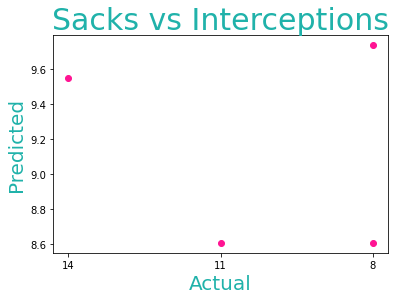

In [45]:
x = sacks_interceptions["Actual"].values
y = sacks_interceptions["Predicted"].values
plt.scatter(x,y, color="deeppink")
plt.xlabel("Actual", fontsize=20, color="lightseagreen")
plt.ylabel("Predicted", fontsize=20, color="lightseagreen")
plt.title("Sacks vs Interceptions", fontsize=30, color="lightseagreen");

# Brady Age VS Stats

In [46]:
brady["Touchdown Passes"] = pd.to_numeric(brady["Touchdown Passes"])

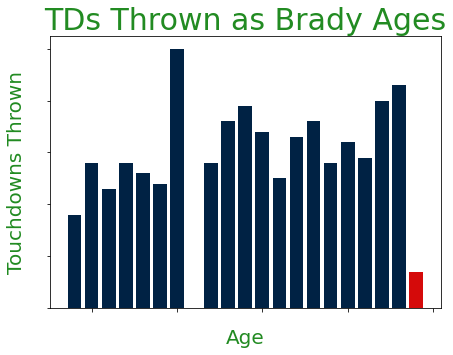

In [47]:
x = brady["Age"]
y = brady["Touchdown Passes"]
c = ["#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#D50A0A", "#D50A0A", "#D50A0A"]

plt.figure(figsize=(7,5))
plt.bar(x, y, color=c)
plt.xlabel("Age", fontsize = 20, color="forestgreen")
plt.xticks(color="white")
plt.ylabel("Touchdowns Thrown", fontsize = 20, color="forestgreen")
plt.yticks(color="white")

plt.title("TDs Thrown as Brady Ages", fontsize = 30, color="forestgreen");

plt.savefig("TDs Thrown as Brady Ages.png")

In [48]:
brady["Rushing Touchdowns"] = pd.to_numeric(brady["Rushing Touchdowns"])

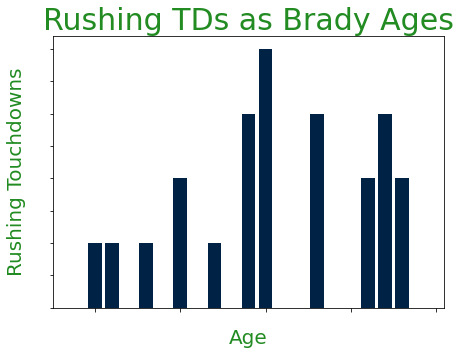

In [49]:
x = brady["Age"]
y = brady["Rushing Touchdowns"]
c = ["#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#D50A0A", "#D50A0A", "#D50A0A"]

plt.figure(figsize=(7,5))
plt.bar(x, y, color = c)
plt.xlabel("Age", fontsize = 20, color="forestgreen")
plt.xticks(color="white")
plt.ylabel("Rushing Touchdowns", fontsize = 20, color="forestgreen")
plt.yticks(color="white")
plt.title("Rushing TDs as Brady Ages", fontsize = 30, color="forestgreen");
plt.savefig("Rushing TDs as Brady Ages.png")

In [50]:
brady["Sacks"] = pd.to_numeric(brady["Sacks"])

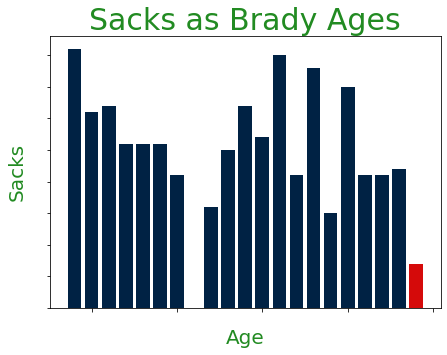

In [51]:
x = brady["Age"]
y = brady["Sacks"]
colors = ["#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#D50A0A", "#D50A0A", "#D50A0A"]

plt.figure(figsize=(7,5))
plt.bar(x, y, color = colors)
plt.xlabel("Age", fontsize = 20, color="forestgreen")
plt.xticks(color="white")
plt.ylabel("Sacks", fontsize = 20, color="forestgreen")
plt.yticks(color="white")
plt.title("Sacks as Brady Ages", fontsize = 30, color="forestgreen");
plt.savefig("Sacks as Brady Ages.png")

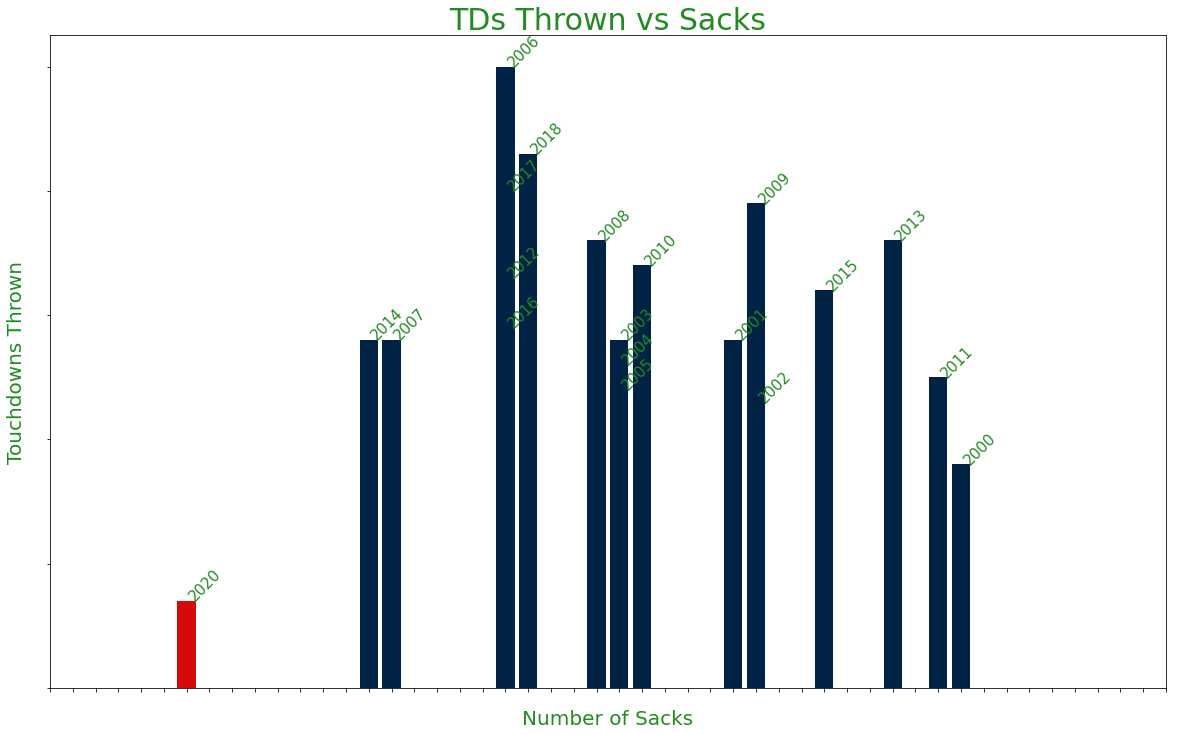

In [52]:
x = brady["Sacks"]
y = brady["Touchdown Passes"]
data = list(zip(years,x.values,y.values))

c = ["#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#D50A0A", "#D50A0A", "#D50A0A"]
plt.figure(figsize=(20,12))
plt.bar(x, y, color=c)
plt.xlabel("Number of Sacks", fontsize = 20, color="forestgreen")
plt.ylabel("Touchdowns Thrown", fontsize = 20, color="forestgreen")
plt.yticks(color="white")
plt.title("TDs Thrown vs Sacks", fontsize = 30, color="forestgreen")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50], color="white")
for year,x,y in data:
    plt.annotate(str(year),(x,y), rotation=45, color="forestgreen", fontsize=15);
plt.savefig("TDs Thrown vs Sacks.png")


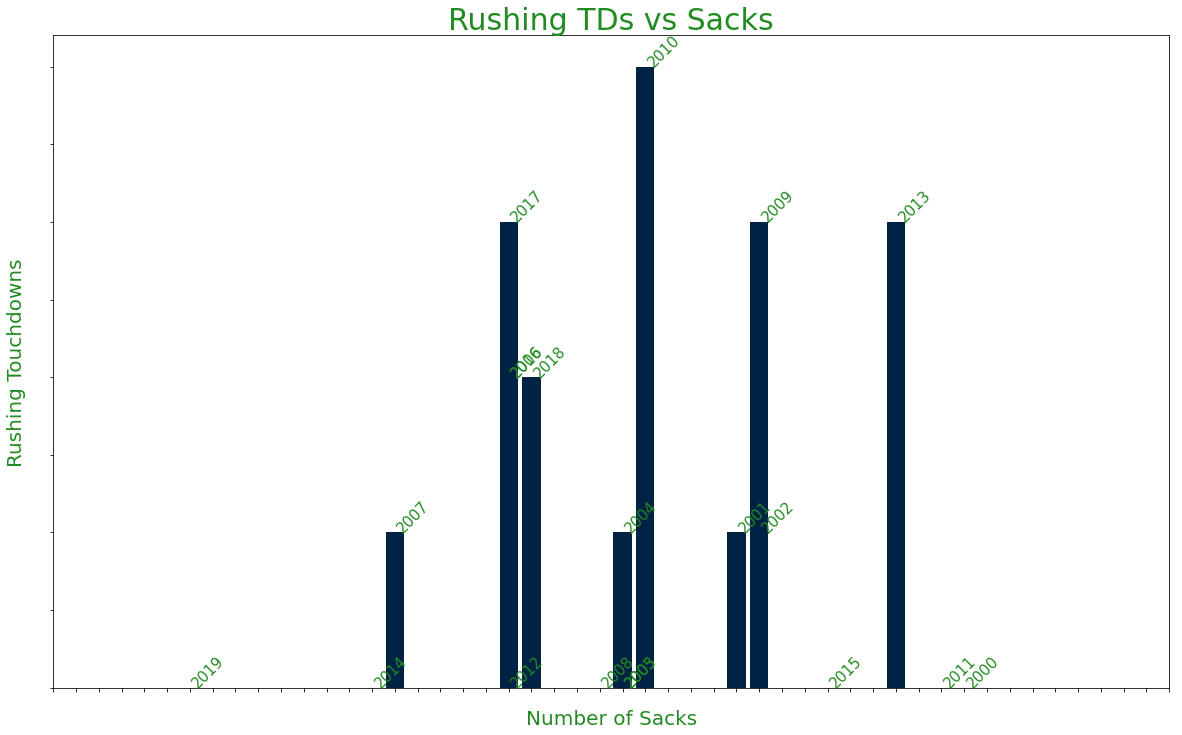

In [53]:
x = brady["Sacks"]
y = brady["Rushing Touchdowns"]
c = ["#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#002244", "#D50A0A", "#D50A0A", "#D50A0A"]
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
data = list(zip(years,x.values,y.values))
plt.figure(figsize=(20,12))
b = plt.bar(x, y, color=c)

plt.xlabel("Number of Sacks", fontsize = 20, color="forestgreen")
plt.ylabel("Rushing Touchdowns", fontsize = 20, color="forestgreen")
plt.title("Rushing TDs vs Sacks", fontsize = 30, color="forestgreen")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50], color="white")
#plt.xticks([1,5,10,15,20,25,30,35,40,45,50])
plt.yticks(color="white")
for year,x,y in data:
    plt.annotate(str(year),(x,y), rotation=45, color="forestgreen", fontsize=15);
plt.savefig("Rushing TDs vs Sacks")

In [54]:
x

7

In [55]:
y

0

In [56]:
brady

,Year,Team,Games Played,Games Started,Completions,Passing Attempts,Passing Yards,Avg Passing Yards,Touchdown Passes,Interceptions,Sacks,Sack Yards Lost,Rate (Passer QB Rating),Rushing Attempts,Rushing Yards Gained,Avg Yards/Carry,Rushing Touchdowns,Fumbles,Lost Fumbles,Age
0,2001,New England Patriots,15,14,264,413,2843,6.9,18,12,41,216,86.5,36,43,1.2,0,,,24
1,2002,New England Patriots,16,16,373,601,3764,6.3,28,14,31,190,85.7,42,110,2.6,1,,,25
2,2003,New England Patriots,16,16,317,527,3620,6.9,23,12,32,219,85.9,42,63,1.5,1,,,26
3,2004,New England Patriots,16,16,288,474,3692,7.8,28,14,26,162,92.6,43,28,0.6,0,,,27
4,2005,New England Patriots,16,16,334,530,4110,7.8,26,14,26,188,92.3,27,89,3.3,1,,,28
5,2006,New England Patriots,16,16,319,516,3529,6.8,24,12,26,175,87.9,49,102,2.1,0,,,29
6,2007,New England Patriots,16,16,398,578,4806,8.3,50,8,21,128,117.2,37,98,2.6,2,,,30
7,2009,New England Patriots,16,16,371,565,4398,7.8,28,13,16,86,96.2,29,44,1.5,1,,,32
8,2010,New England Patriots,16,16,324,492,3900,7.9,36,4,25,175,111,31,30,1,0,,,33
9,2011,New England Patriots,16,16,401,611,5235,8.6,39,12,32,173,105.6,43,109,2.5,3,,,34


In [ ]:
range()